In [183]:
from halp.directed_hypergraph import DirectedHypergraph

from halp.algorithms.directed_paths import shortest_b_tree
import networkx as nx
import matplotlib.pyplot as plt
from helper import *

In [138]:
H = DirectedHypergraph()
H.add_hyperedge([1], [2])
H.add_hyperedge([1], [3])
H.add_hyperedge([2, 3], [4])
H.add_hyperedge([1], [5])
H.add_hyperedge([4, 5], [6])
H.add_hyperedge([6], [7])

'e6'

In [139]:
id_source_vertex = 1

mapping, weight_dict = shortest_b_tree(H, id_source_vertex)

In [140]:
weight_tuples = [(vertex_id, weight_dict[vertex_id]) for vertex_id in weight_dict.keys()]
weight_tuples.sort(key=lambda x: x[1])

In [154]:
# Runs the SBT algorithm for vertex "id_source_vertex" as source.
mapping, weight_dict = shortest_b_tree(H, id_source_vertex)
# mapping: dict: keys (int): vertices ids, values (strings): id of the last hyperedge on the shortest B-path that connects id_source_vertex and the key.
# weight_dict: dict: keys (int): vertices ids, values (int): weight that the SBT algorithm assigns to each vertex.

# Returns for each node the tree in which it is the root.
root_tree_mapping = {}

# For each node that was already analyzed, the mapping returns the tree in which the node is part of
# (A node can be the leaf in multiple trees but only has outgoing connections in one tree. The mapping returns this tree.)
node_tree_mapping = {}

main_tree = nx.DiGraph()
node_tree_mapping[str(id_source_vertex)] = main_tree
root_tree_mapping[str(id_source_vertex)] = main_tree

for (vertex_id, _) in weight_tuples:
    hyperedge_id = mapping[vertex_id]
    if hyperedge_id is None:
        continue

    tail_vertex_id_list = H.get_hyperedge_tail(hyperedge_id)

    print(vertex_id, tail_vertex_id_list)

    # todo: think about this case again.
    # probably cannot happen anyway.
    if len(tail_vertex_id_list) == 0:
        continue

    if len(tail_vertex_id_list) == 1:
        tail_vertex_id = tail_vertex_id_list[0]
        tree_of_tail_vertex = node_tree_mapping[str(tail_vertex_id)]

        tree_of_tail_vertex.add_edge(str(vertex_id), str(tail_vertex_id)) #
        node_tree_mapping[str(vertex_id)] = tree_of_tail_vertex
    else:
        # Tail has multiple vertex: Start new tree.
        new_tree = nx.DiGraph()
        node_tree_mapping[str(vertex_id)] = new_tree
        root_tree_mapping[str(vertex_id)] = new_tree

        for idx, tail_vertex_id in enumerate(tail_vertex_id_list):
             tree_of_tail_vertex = node_tree_mapping[str(tail_vertex_id)]
             # Todo: ensure that no tail has less than 100 vertices.
             tree_of_tail_vertex.add_edge(str(vertex_id) + "_" + str(idx), str(tail_vertex_id)) #vertex_id * 100 + idx)

2 [1]
3 [1]
5 [1]
4 [2, 3]
6 [4, 5]
7 [6]


In [156]:
root_tree_mapping["1"].nodes

NodeView(('2', '1', '3', '5', '4_0', '4_1', '6_1'))

In [157]:
root_tree_mapping

{'1': <networkx.classes.digraph.DiGraph at 0x205dac47f50>,
 '4': <networkx.classes.digraph.DiGraph at 0x205fdb0a0c0>,
 '6': <networkx.classes.digraph.DiGraph at 0x205fdb0ba40>}

In [158]:
node_tree_mapping

{'1': <networkx.classes.digraph.DiGraph at 0x205dac47f50>,
 '2': <networkx.classes.digraph.DiGraph at 0x205dac47f50>,
 '3': <networkx.classes.digraph.DiGraph at 0x205dac47f50>,
 '5': <networkx.classes.digraph.DiGraph at 0x205dac47f50>,
 '4': <networkx.classes.digraph.DiGraph at 0x205fdb0a0c0>,
 '6': <networkx.classes.digraph.DiGraph at 0x205fdb0ba40>,
 '7': <networkx.classes.digraph.DiGraph at 0x205fdb0ba40>}

In [159]:
def draw_tree(tree, id_source_vertex):
    colors = ['red' if node == str(id_source_vertex) else 'lightblue' for node in tree.nodes()]
    nx.draw(tree, with_labels=True, node_color=colors)

In [161]:
root_tree_mapping["1"].nodes

NodeView(('2', '1', '3', '5', '4_0', '4_1', '6_1'))

In [163]:
root_tree_mapping["4"].nodes

NodeView(('6_0', '4'))

In [164]:
node_tree_mapping["4"].nodes

NodeView(('6_0', '4'))

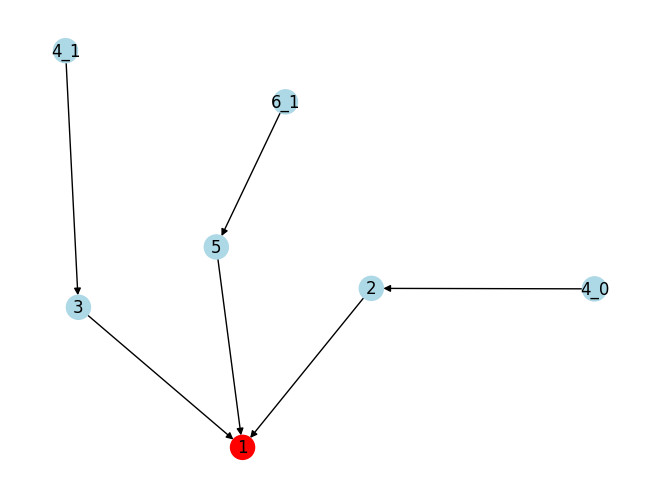

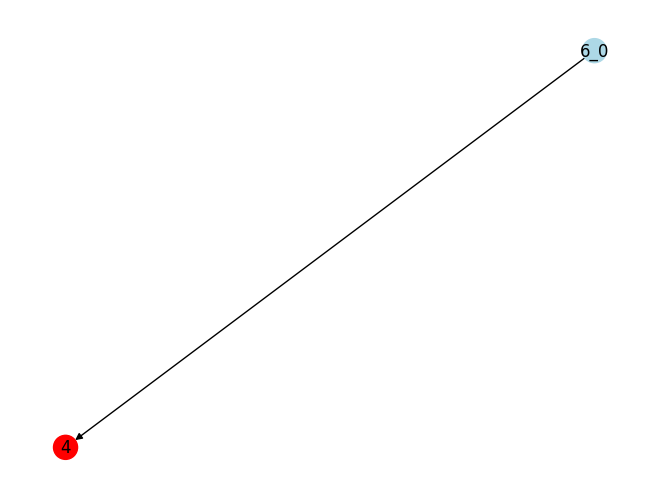

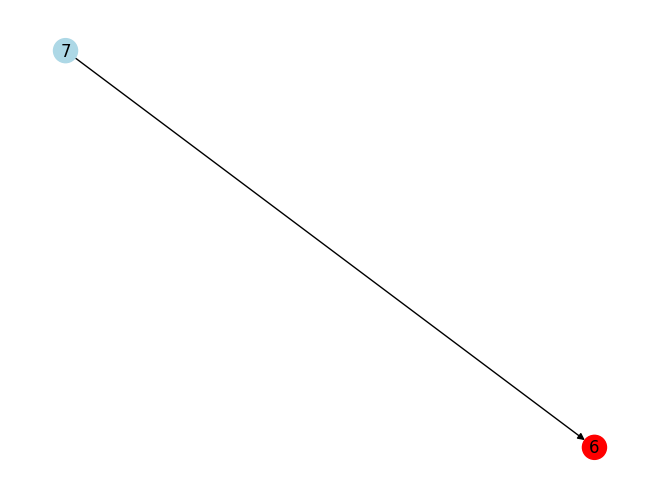

In [165]:
for root in root_tree_mapping.keys():
    plt.figure()
    draw_tree(root_tree_mapping[root], root)

In [188]:
root = "1"
T = root_tree_mapping[root]

size, hl_labels = HLD(T, root, {})
nx.set_edge_attributes(T, hl_labels,'hl')

Paths = BFS_paths(T, root)

In [189]:
Paths

[['1', '2', '4_0'], ['1', '3', '4_1'], ['1', '5', '6_1']]